In [57]:
#DATA CREATION

In [109]:
import numpy as np #numerical operations
import pandas as pd #data manipulation
# Import Libraries for Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
np.random.seed(42)

In [113]:
states = ['California', 'Texas', 'New York', 'Florida', 'Illinois', 
          'Pennsylvania', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']

sectors = ['Residential', 'Commercial', 'Industrial', 'Transportation']

In [115]:
dates = pd.date_range(start='2023-01-01', end='2024-12-01', freq='MS')

In [117]:
data=[]

In [119]:
for date in dates:
    for state in states:
        for sector in sectors:
            consumption = np.random.uniform(500, 5000)  # in GWh
            price = np.random.uniform(8, 20)            # in cents per kWh
            data.append([date, state, sector, round(consumption, 2), round(price, 2)])


In [121]:
df = pd.DataFrame(data, columns=['Date', 'State', 'Sector', 
                                 'Electricity_Consumption_GWh', 'Price_cents_per_kWh'])


In [123]:
df

,Date,State,Sector,Electricity_Consumption_GWh,Price_cents_per_kWh
0,2023-01-01,California,Residential,2185.43,19.41
1,2023-01-01,California,Commercial,3793.97,15.18
2,2023-01-01,California,Industrial,1202.08,9.87
3,2023-01-01,California,Transportation,761.38,18.39
4,2023-01-01,Texas,Residential,3205.02,16.50
...,...,...,...,...,...
955,2024-12-01,North Carolina,Transportation,1875.22,18.52
956,2024-12-01,Michigan,Residential,4983.50,12.42
957,2024-12-01,Michigan,Commercial,2518.75,16.66
958,2024-12-01,Michigan,Industrial,4487.88,15.12


In [125]:
df['Date'] = pd.to_datetime(df['Date'])

In [127]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [129]:
df.head(10)

,Date,State,Sector,Electricity_Consumption_GWh,Price_cents_per_kWh,Year,Month
0,2023-01-01,California,Residential,2185.43,19.41,2023,1
1,2023-01-01,California,Commercial,3793.97,15.18,2023,1
2,2023-01-01,California,Industrial,1202.08,9.87,2023,1
3,2023-01-01,California,Transportation,761.38,18.39,2023,1
4,2023-01-01,Texas,Residential,3205.02,16.50,2023,1
5,2023-01-01,Texas,Commercial,592.63,19.64,2023,1
6,2023-01-01,Texas,Industrial,4245.99,10.55,2023,1
7,2023-01-01,Texas,Transportation,1318.21,10.20,2023,1
8,2023-01-01,New York,Residential,1869.09,14.30,2023,1
9,2023-01-01,New York,Commercial,2443.75,11.49,2023,1


In [131]:
df.isnull().sum()

Date                           0
State                          0
Sector                         0
Electricity_Consumption_GWh    0
Price_cents_per_kWh            0
Year                           0
Month                          0
dtype: int64

In [133]:
#Fill missing numeric values with mean/median:
#df['Electricity_Consumption_GWh'].fillna(df['Electricity_Consumption_GWh'].mean(), inplace=True)
#Drop rows :
#df.dropna(inplace=True)

In [135]:
df.info() #SUMMARY OF DATA TYPES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         960 non-null    datetime64[ns]
 1   State                        960 non-null    object        
 2   Sector                       960 non-null    object        
 3   Electricity_Consumption_GWh  960 non-null    float64       
 4   Price_cents_per_kWh          960 non-null    float64       
 5   Year                         960 non-null    int32         
 6   Month                        960 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(2)
memory usage: 45.1+ KB


In [137]:
df.describe() #View Statistical Summary

,Date,Electricity_Consumption_GWh,Price_cents_per_kWh,Year,Month
count,960,960.000000,960.000000,960.000000,960.000000
mean,2023-12-16 10:00:00,2697.441292,14.125052,2023.500000,6.500000
min,2023-01-01 00:00:00,522.230000,8.060000,2023.000000,1.000000
25%,2023-06-23 12:00:00,1467.647500,11.097500,2023.000000,3.750000
50%,2023-12-16 12:00:00,2713.395000,14.230000,2023.500000,6.500000
75%,2024-06-08 12:00:00,3883.612500,17.032500,2024.000000,9.250000
max,2024-12-01 00:00:00,4997.360000,20.000000,2024.000000,12.000000
std,NaN,1349.276995,3.427210,0.500261,3.453852


In [139]:
#EXPLORATORY DATA ANALYSIS

In [141]:
#1.Find which states consume the most electricity on average

In [143]:
avg_consumption = df.groupby('State')['Electricity_Consumption_GWh'].mean().sort_values(ascending=False)

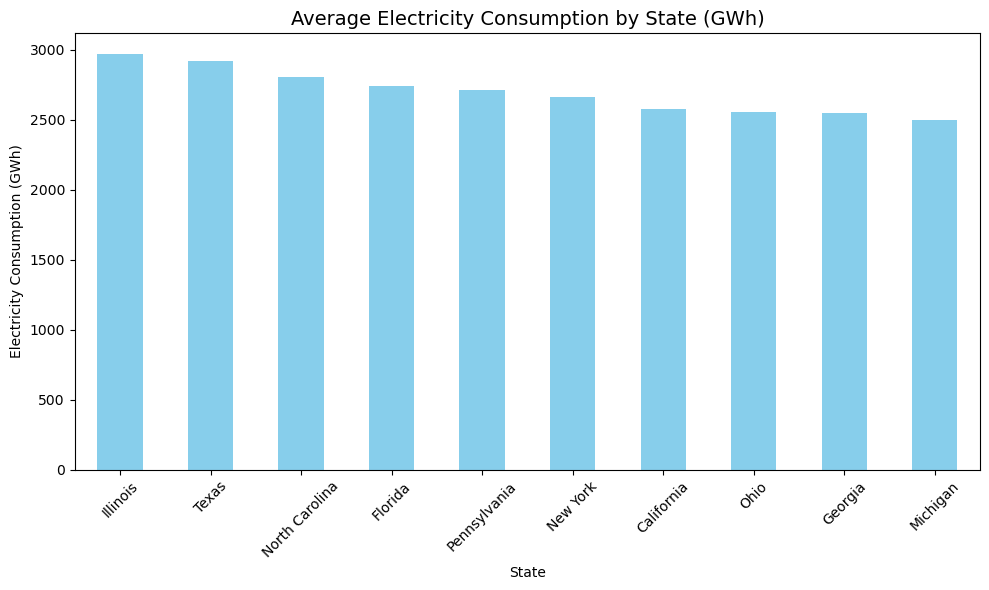

In [145]:
plt.figure(figsize=(10,6))
avg_consumption.plot(kind='bar', color='skyblue')
plt.title('Average Electricity Consumption by State (GWh)', fontsize=14)
plt.ylabel('Electricity Consumption (GWh)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

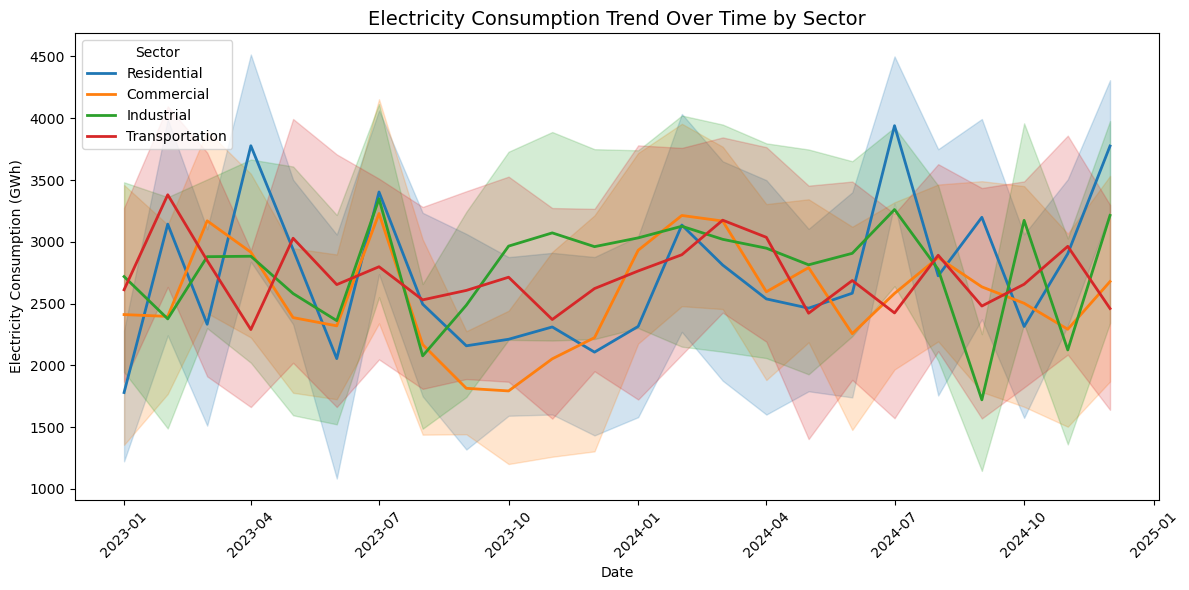

In [147]:
# 2. Consumption Trend Over Time by Sector
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Electricity_Consumption_GWh', hue='Sector', linewidth=2)
plt.title('Electricity Consumption Trend Over Time by Sector', fontsize=14)
plt.ylabel('Electricity Consumption (GWh)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

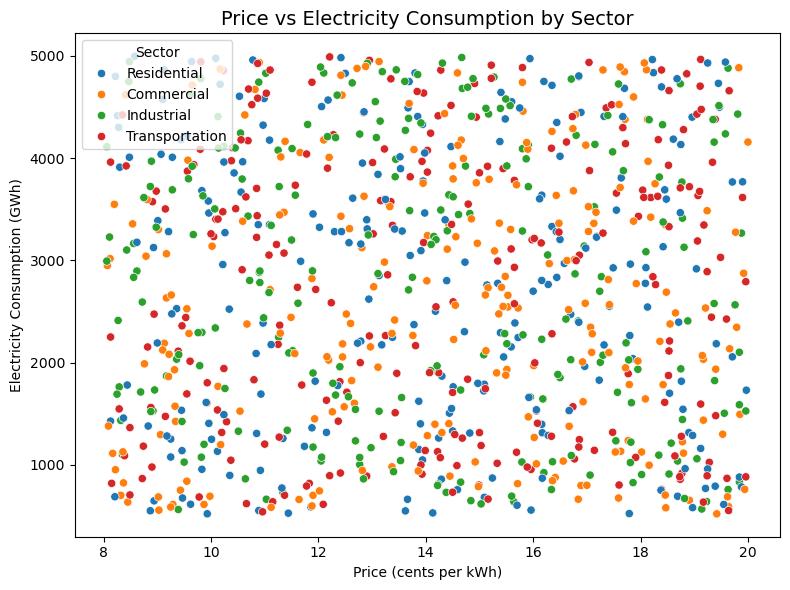

In [149]:
# 3. Price vs Consumption Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Price_cents_per_kWh', y='Electricity_Consumption_GWh', hue='Sector')
plt.title('Price vs Electricity Consumption by Sector', fontsize=14)
plt.xlabel('Price (cents per kWh)')
plt.ylabel('Electricity Consumption (GWh)')
plt.tight_layout()
plt.show()

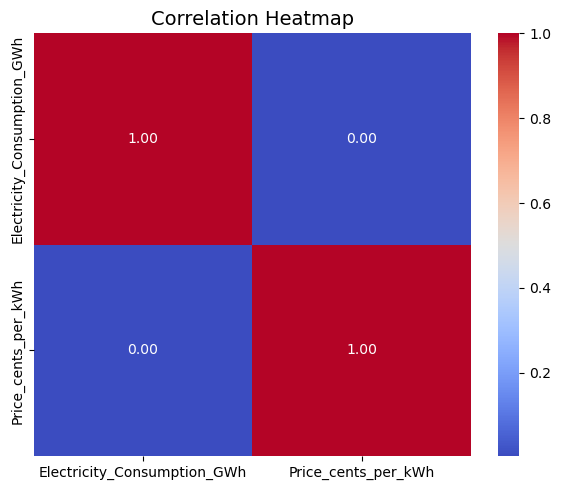

In [155]:
# 4. Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[['Electricity_Consumption_GWh', 'Price_cents_per_kWh']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

In [157]:
#Forecasting Electricity Consumption Using Prophet

In [159]:
pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 249.9 kB/s eta 0:00:000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 39.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [161]:
from prophet import Prophet

In [163]:
# Filter data for California and Residential sector
california_res = df[(df['State'] == 'California') & (df['Sector'] == 'Residential')]

# Prophet requires columns: 
# 'ds' (Date) and 'y' (Target Value)

prophet_df = california_res[['Date', 'Electricity_Consumption_GWh']].rename(columns={
    'Date': 'ds',
    'Electricity_Consumption_GWh': 'y'
})

# Check the prepared data
print(prophet_df.head())

            ds        y
0   2023-01-01  2185.43
40  2023-02-01  4383.97
80  2023-03-01  2155.02
120 2023-04-01  4732.06
160 2023-05-01  2971.52


In [165]:
# Initialize Prophet model
model = Prophet()

# Fit the model to historical data
model.fit(prophet_df)


11:28:40 - cmdstanpy - INFO - Chain [1] start processing
11:28:41 - cmdstanpy - INFO - Chain [1] done processing


In [167]:
# Forecast for the next 12 months
future = model.make_future_dataframe(periods=12, freq='MS')

# Check future dates
print(future.tail())

           ds
31 2025-08-01
32 2025-09-01
33 2025-10-01
34 2025-11-01
35 2025-12-01


In [169]:
# Generate forecast
forecast = model.predict(future)

# Display forecast dataframe
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
31,2025-08-01,2434.024953,713.161472,4116.106772
32,2025-09-01,2411.491813,587.826310,4227.009306
33,2025-10-01,2389.685548,623.844528,4053.733652
34,2025-11-01,2367.152408,589.767648,4067.769946
35,2025-12-01,2345.346144,584.706140,4062.176326


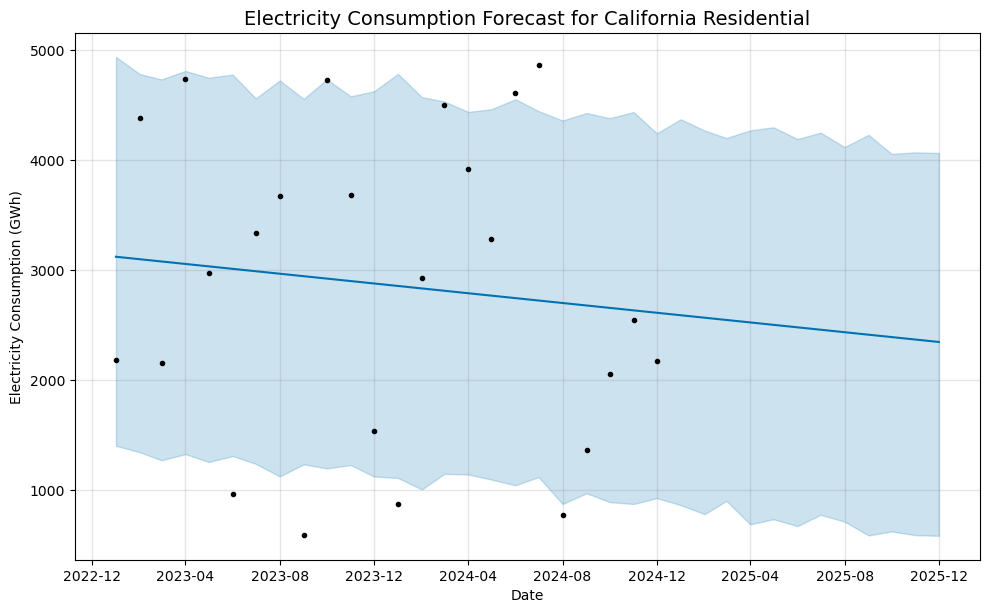

In [171]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Electricity Consumption Forecast for California Residential', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (GWh)')
plt.show()

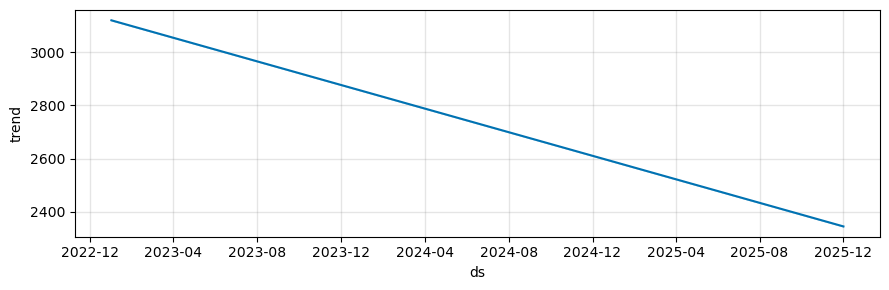

In [173]:
# Shows trend and seasonality components
fig2 = model.plot_components(forecast)
plt.show()

In [181]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [183]:
import streamlit as st

In [185]:
st.set_page_config(page_title="Electricity Forecast Dashboard", layout="wide")
# Title and Description
st.title('🔌 Electricity Consumption Forecast Dashboard')
st.subheader('Forecast electricity demand by State and Sector for the next 12 months')


DeltaGenerator()

11:45:00 - cmdstanpy - INFO - Chain [1] start processing
11:45:00 - cmdstanpy - INFO - Chain [1] done processing


DeltaGenerator()

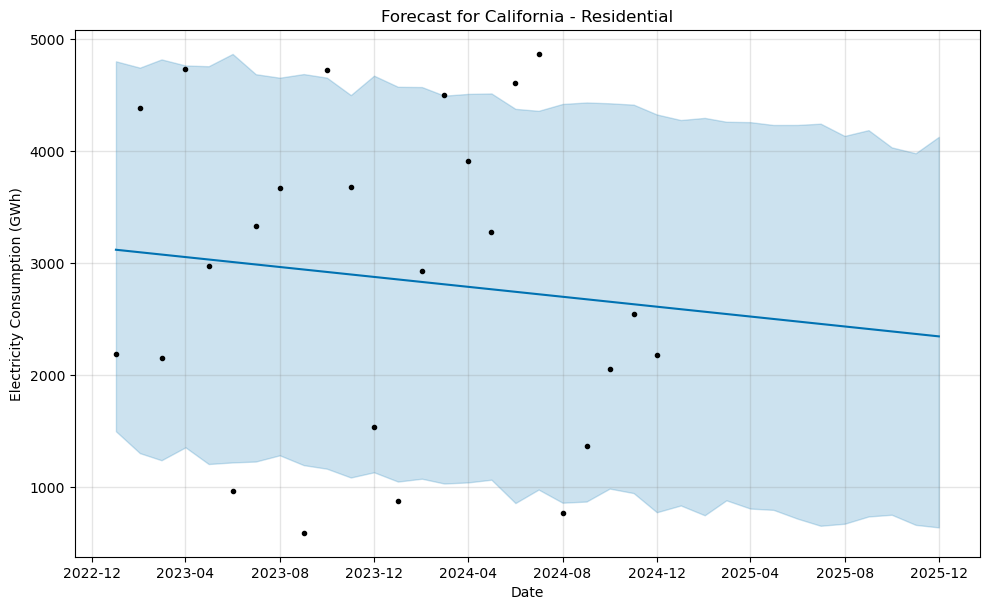

In [191]:
# 🎯 Sidebar Inputs
st.sidebar.header('Select Forecast Parameters')
selected_state = st.sidebar.selectbox('Select State', states)
selected_sector = st.sidebar.selectbox('Select Sector', sectors)

# 🎯 Filter data
filtered_data = df[(df['State'] == selected_state) & (df['Sector'] == selected_sector)]

# 🎯 Prepare data for Prophet
prophet_df = filtered_data[['Date', 'Electricity_Consumption_GWh']].rename(columns={
    'Date': 'ds',
    'Electricity_Consumption_GWh': 'y'
})

# 🎯 Train model
model = Prophet()
model.fit(prophet_df)

# 🎯 Create future data
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

# 🎯 Forecast Plot
st.subheader(f'📈 Forecast for {selected_state} - {selected_sector} Sector')

fig1 = model.plot(forecast)
plt.title(f'Forecast for {selected_state} - {selected_sector}')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (GWh)')
st.pyplot(fig1)
